In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("Automobile_data.csv")

In [3]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


C:\Users\itvedant-le1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


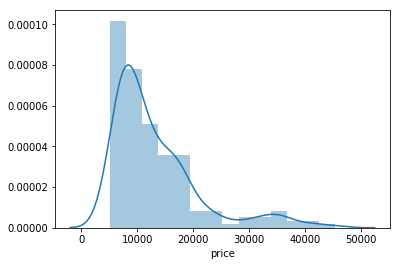

In [4]:
sns.distplot(df["price"])

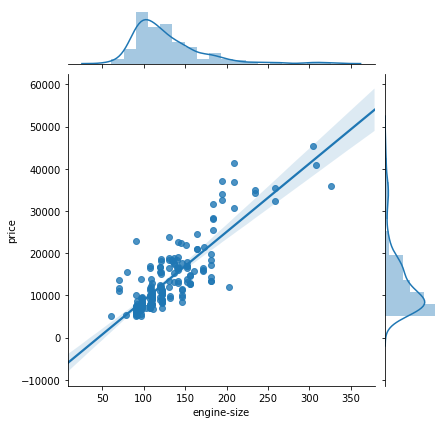

In [5]:
sns.jointplot(x="engine-size",y="price",data=df,kind="reg")

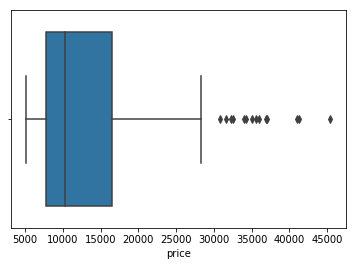

In [6]:
sns.boxplot(df["price"])

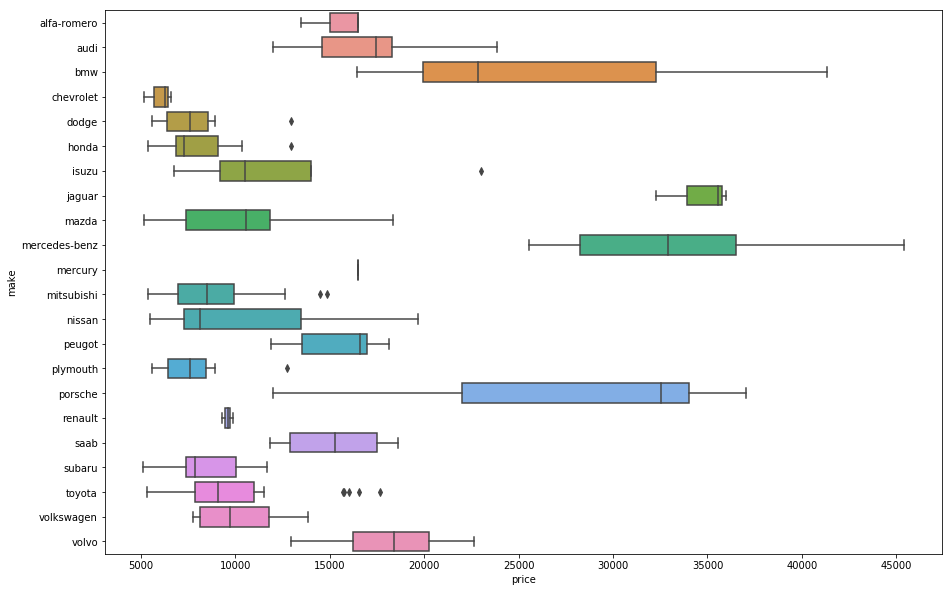

In [7]:
plt.figure(figsize=(15,10))
sns.boxplot(y="make", x="price",data=df)
plt.show()

In [8]:
from scipy.stats import skew

In [9]:
skew(df["engine-size"])

1.9333748457840114

In [10]:
num_col = df._get_numeric_data().columns.tolist()

In [11]:
for col in num_col:
    print(skew(df[col]))

0.20952469094997359
0.8973753485201392
0.06265991683394276
1.9333748457840114
0.6588377533622138
0.5360379305163596
1.791937476907277


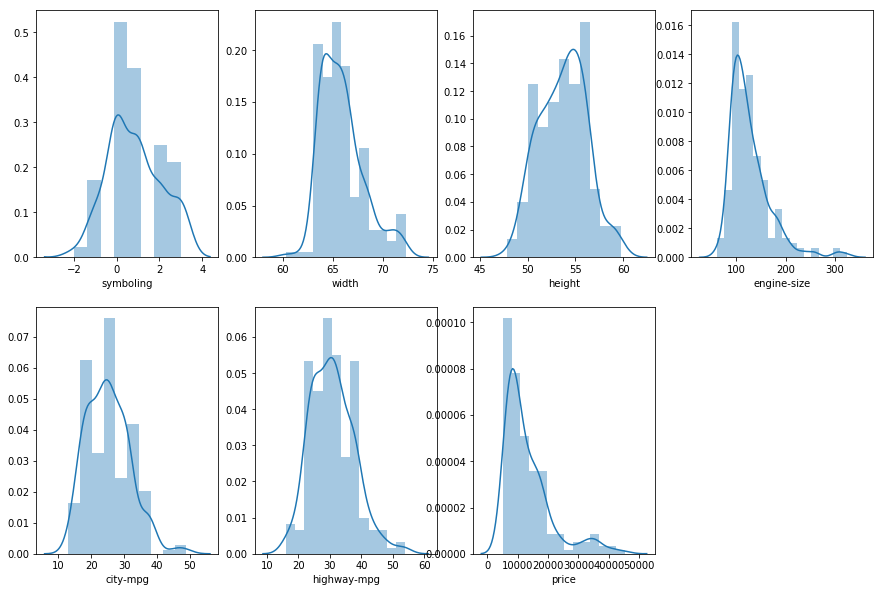

In [12]:
plt.figure(figsize=(15,10))
i=1
for col in num_col:
    plt.subplot(2,4,i)
    sns.distplot(df[col])
    i+=1
plt.show()

In [13]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [14]:
df.replace("?",np.nan,inplace=True)

In [15]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [16]:
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values=np.nan, strategy="mean")

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
df["normalized-losses"] = imputer.fit_transform(df[["normalized-losses"]])
df["horsepower"] = imputer.fit_transform(df[["horsepower"]])

In [18]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [19]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

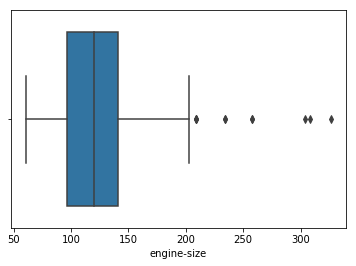

In [20]:
sns.boxplot(df["engine-size"])

In [21]:
def standard(col):
    m = col.mean()
    s = col.std()
    return (col-m)/s

In [22]:
df["engine_std"] = standard(df["engine-size"])

In [23]:
df[df["engine_std"] > 3]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price,engine_std
47,0,145.0,jaguar,gas,sedan,rwd,front,69.6,52.8,dohc,258,176.0,15,19,32250,3.148036
48,0,122.0,jaguar,gas,sedan,rwd,front,69.6,52.8,dohc,258,176.0,15,19,35550,3.148036
49,0,122.0,jaguar,gas,sedan,rwd,front,70.6,47.8,ohcv,326,262.0,13,17,36000,4.780975
73,0,122.0,mercedes-benz,gas,sedan,rwd,front,71.7,56.7,ohcv,308,184.0,14,16,40960,4.348726
74,1,122.0,mercedes-benz,gas,hardtop,rwd,front,72.0,55.4,ohcv,304,184.0,14,16,45400,4.252671


In [24]:
num_col = df._get_numeric_data().drop("engine_std",axis=1)

In [25]:
col = num_col.columns.tolist()

In [26]:
for c in col:
    if skew(num_col[c]) > 1:
        num_col[c] = np.log(num_col[c])

In [27]:
for c in col:
   print(skew(num_col[c]))
        

0.20952469094997359
0.8485348696008058
0.8973753485201392
0.06265991683394276
0.8515380844251106
0.46717448184473426
0.6588377533622138
0.5360379305163596
0.6644926145446154


C:\Users\itvedant-le1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


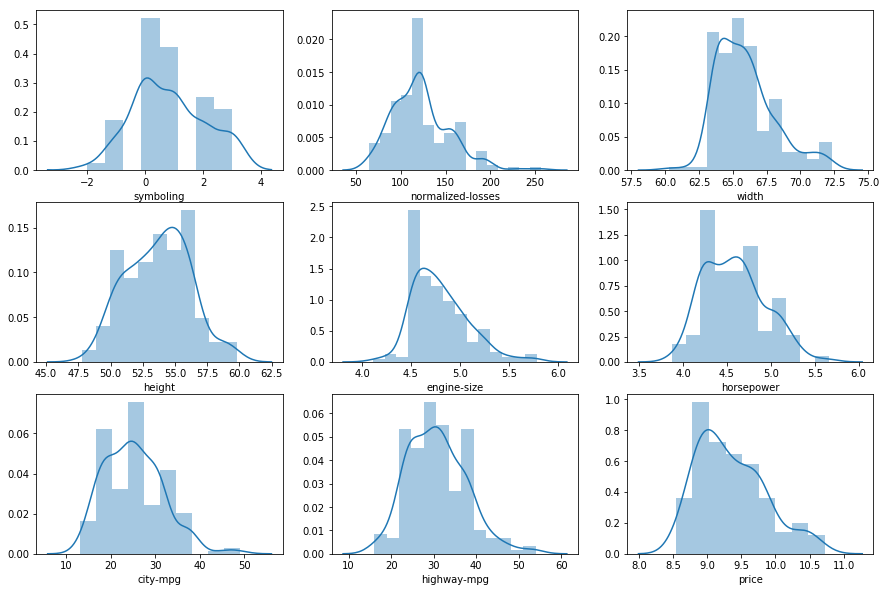

In [28]:
plt.figure(figsize=(15,10))
i=1
for c in col:
    plt.subplot(3,3,i)
    sns.distplot(num_col[c])
    i+=1
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [30]:
mm = MinMaxScaler()
ss = StandardScaler()

In [31]:
df["normalized-losses"] = mm.fit_transform(df[["normalized-losses"]])

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


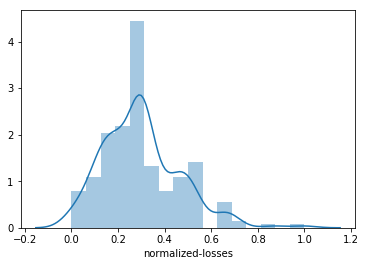

In [32]:
sns.distplot(df["normalized-losses"])

In [33]:
df["normalized-losses"] = ss.fit_transform(df[["normalized-losses"]])

C:\Users\itvedant-le1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


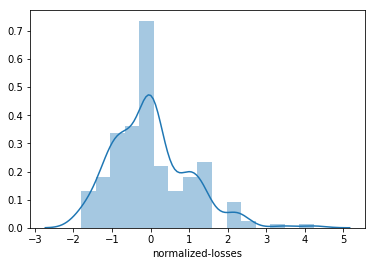

In [34]:
sns.distplot(df["normalized-losses"])

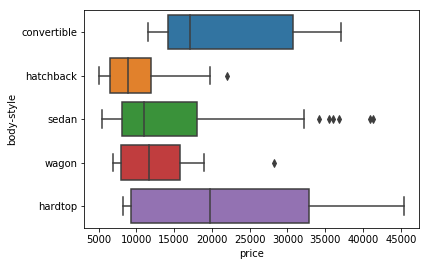

In [35]:
sns.boxplot(y="body-style",x="price",data=df)

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
df["body-style-label"] = le.fit_transform(df["body-style"])

In [38]:
df["body-style-label"].head()

0    0
1    0
2    2
3    3
4    3
Name: body-style-label, dtype: int32

In [39]:
#One hot encoding
fuel_encode = pd.get_dummies(df["fuel-type"])

In [40]:
fuel_encode

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [41]:
price = pd.Series(["32$","20,000$","40,000$"])

In [42]:
price = price.apply(lambda x:x.replace(",",""))

In [43]:
price = price.apply(lambda x:x[:-1])

In [44]:
price = price.astype('int')

In [45]:
price

0       32
1    20000
2    40000
dtype: int32

In [46]:
df["area"] = df["height"] * df["width"]